In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from ramandecompy import datavis
from ramandecompy import dataprep
from ramandecompy import datavis

In [2]:
hdf5 = h5py.File('ramandecompy/tests/test_files/test_experiment.hdf5', 'r')
x_data = np.asarray(hdf5['300C/25s/wavenumber'])
y_data = np.asarray(hdf5['300C/25s/counts'])
hdf5.close()

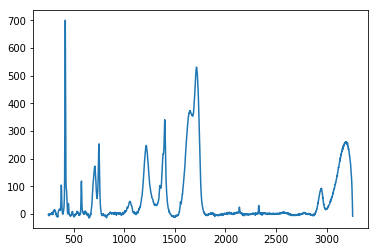

In [3]:
plt.plot(x_data, y_data)

In [4]:
dataprep.view_hdf5('ramandecompy/tests/test_files/test_experiment.hdf5')

**** ramandecompy/tests/test_files/test_experiment.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09*
|    |    Peak_10*
|    |    Peak_11*
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak

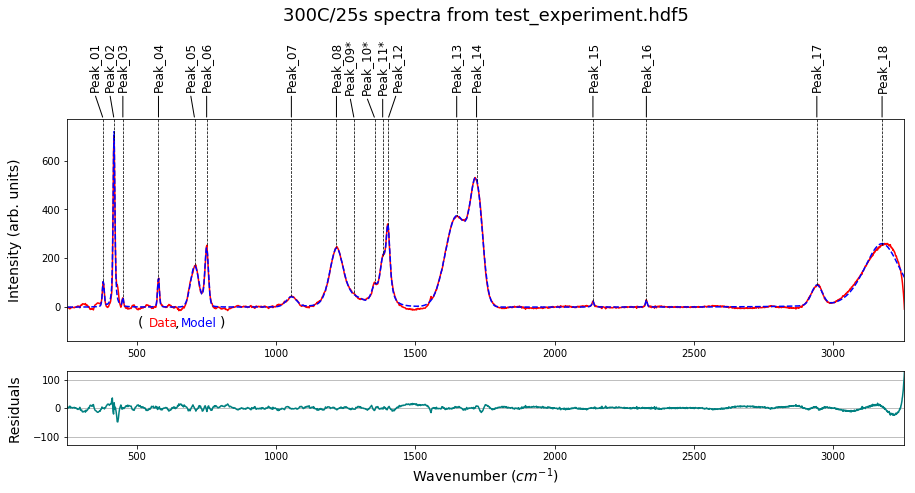

In [15]:
datavis.plot_fit('ramandecompy/tests/test_files/test_experiment.hdf5', '300C/25s')
plt.savefig('fit_formicAcid_spectra', dpi=300, bbox_inches='tight')

In [6]:
hdf5 = h5py.File('ramandecompy/tests/test_files/test_experiment.hdf5', 'r')
print(list(hdf5['300C/25s/Peak_07']))
hdf5.close()

[(0.02472056, 22.07378646, 1054.49947901, 1906.4703234, 44.14757293, 40.24542427, 1905.90827989)]


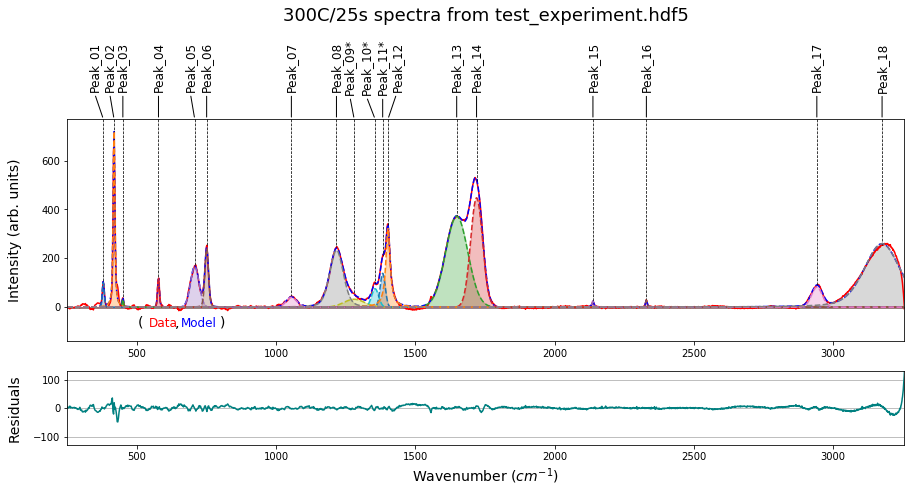

In [16]:
fig, ax1, ax2 = datavis.plot_fit('ramandecompy/tests/test_files/test_experiment.hdf5', '300C/25s')
peak_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
datavis.plot_components(ax1, 'ramandecompy/tests/test_files/test_experiment.hdf5', '300C/25s', peak_list)
plt.savefig('fit_formicAcid_spectra_withProfiles', dpi=300, bbox_inches='tight')

In [8]:
def plot_components(ax, hdf5_file, key, peak_list):
    """docstring"""
    # will turn int or float into list
    if isinstance(peak_list, (int, float)):
        peak_list = [peak_list]
    else:
        pass
    for _, peak_number in enumerate(peak_list):
        plot_component(ax, hdf5_file, key, peak_number)

In [9]:
from shutil import copyfile
# create a copy of test_experiment.hdf5
copyfile('ramandecompy/tests/test_files/test_calibration.hdf5', 'plotting.hdf5')

'plotting.hdf5'

In [10]:
dataprep.add_calibration('plotting.hdf5', 'ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx', 'formic acid')

Data from ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx fit with compound pseudo-Voigt model.
     Results saved to plotting.hdf5.


In [11]:
dataprep.view_hdf5('plotting.hdf5')

**** plotting.hdf5 ****
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
formic acid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


In [12]:
hdf5 = h5py.File('plotting.hdf5', 'r')
co_x = np.asarray(hdf5['carbon monoxide/wavenumber'])
co_y = np.asarray(hdf5['carbon monoxide/counts'])
co2_x = np.asarray(hdf5['carbon dioxide/wavenumber'])
co2_y = np.asarray(hdf5['carbon dioxide/counts'])
water_x = np.asarray(hdf5['water/wavenumber'])
water_y = np.asarray(hdf5['water/counts'])
methane_x = np.asarray(hdf5['methane/wavenumber'])
methane_y = np.asarray(hdf5['methane/counts'])
hydrogen_x = np.asarray(hdf5['hydrogen/wavenumber'])
hydrogen_y = np.asarray(hdf5['hydrogen/counts'])
fa_x = np.asarray(hdf5['formic acid/wavenumber'])
fa_y = np.asarray(hdf5['formic acid/counts'])
hdf5.close()

Text(0.5, 1.0, 'Experimental Mixture Spectra')

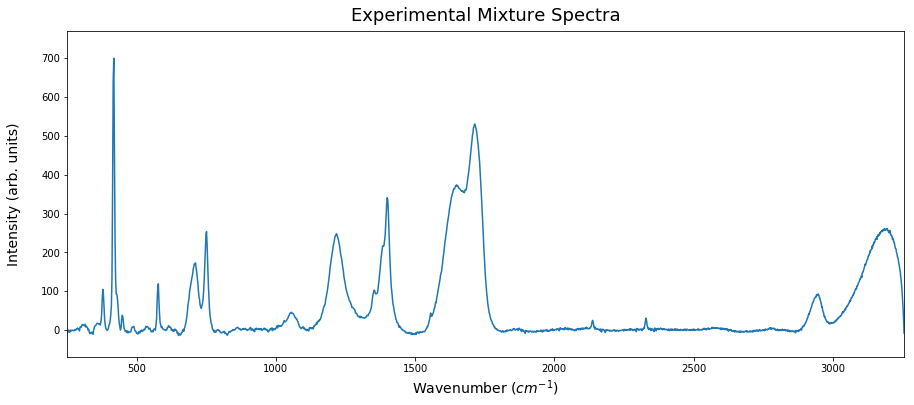

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(x_data, y_data, color='C0')
# plot labels
ax.set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=14)
ax.set_xlim(min(x_data), max(x_data))
ax.set_ylim(0-0.1*max(y_data), 1.1*max(y_data))
ax.set_ylabel('Intensity (arb. units)', fontsize=14, labelpad=20)
ax.set_title('Experimental Mixture Spectra', fontsize=18, pad=10)

# plt.savefig('experimental_spectra', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Formic Acid Calibration Spectra')

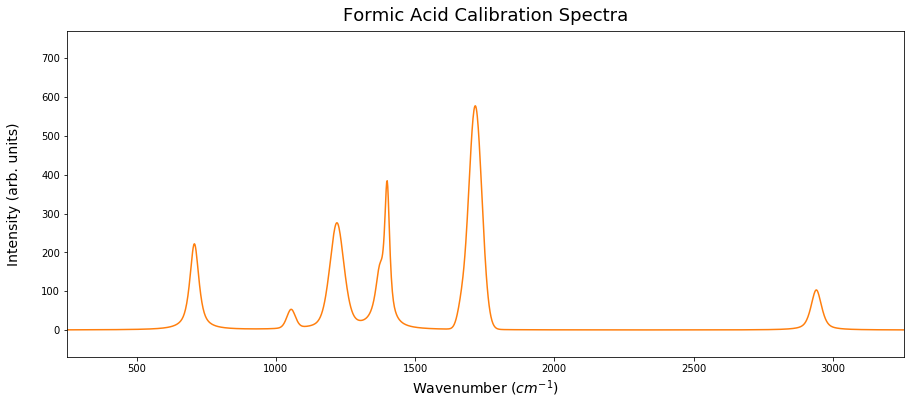

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(fa_x, fa_y, color='C1')
# plt.plot(co_x, co_y)
# plt.plot(hydrogen_x, hydrogen_y)
# plot labels
ax.set_xlabel('Wavenumber ($cm^{-1}$)', fontsize=14)
ax.set_xlim(min(x_data), max(x_data))
ax.set_ylim(0-0.1*max(y_data), 1.1*max(y_data))
ax.set_ylabel('Intensity (arb. units)', fontsize=14, labelpad=20)
ax.set_title('Formic Acid Calibration Spectra', fontsize=18, pad=10)

# plt.savefig('formicAcid_calibration_spectra', dpi=300, bbox_inches='tight')